# COMP4651 Project — Kaggle competition https://www.kaggle.com/c/ga-customer-revenue-prediction/overview
### - Data collected from https://www.kaggle.com/qnkhuat/make-data-ready/code
### - Those data are already cleaned!!!
### - Please read the code within the website to understand what is cleaned and processed!!!

In [1]:
import pandas as pd
import sys
import os
import os.path as osp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

In [2]:
train_data = None
test_data = None

for i in range(9):
    if i == 0:
        train_data = pd.read_pickle(osp.join(os.getcwd(), "input-forked", "train_"+str(i)+".pkl"))
        continue
    else:
        temp = pd.read_pickle(osp.join(os.getcwd(), "input-forked", "train_"+str(i)+".pkl"))
        train_data = pd.concat([train_data, temp], ignore_index=True)

for j in range(3):
    if j == 0:
        test_data = pd.read_pickle(osp.join(os.getcwd(), "input-forked", "test_"+str(j)+".pkl"))
        continue
    else:
        temp = pd.read_pickle(osp.join(os.getcwd(), "input-forked", "test_"+str(j)+".pkl"))
        test_data = pd.concat([test_data, temp], ignore_index=True)
    


In [3]:
print(type(train_data))
print(type(test_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
print(train_data.columns)

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_sessionQualityDim',
       'totals_timeOnSite', 'totals_totalTransactionRevenue',
       'totals_transactionRevenue', 'totals_transactions', 'totals_visits',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       '

653534     2.312950e+10
764560     1.785550e+10
668147     1.602375e+10
1020100    1.322940e+10
810066     1.229300e+10
1449340    1.058914e+10
1316657    9.925110e+09
1693239    8.677830e+09
1349475    8.248800e+09
270728     7.427430e+09
Name: totals_transactionRevenue, dtype: float64 

1135634    0.0
1135635    0.0
1135636    0.0
1135637    0.0
1135638    0.0
1135639    0.0
1135640    0.0
1135641    0.0
1135642    0.0
0          0.0
Name: totals_transactionRevenue, dtype: float64 

count    1.708337e+06
mean     1.355906e+06
std      4.522809e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: totals_transactionRevenue, dtype: float64 



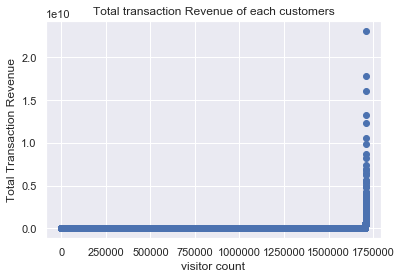

In [5]:
sorted_revenue = train_data['totals_transactionRevenue'].sort_values(ascending=False)
top_10_revenue = sorted_revenue.head(10)
least_10_revenue = sorted_revenue.tail(10)

print(top_10_revenue, '\n')
print(least_10_revenue, '\n')
print(sorted_revenue.describe(), '\n')

# train_data.plot.scatter(x='visitId', y='totals_transactionRevenue')
plt.scatter(x=range(len(sorted_revenue)), y=sorted_revenue.sort_values(ascending=True))

plt.title("Total transaction Revenue of each customers")
plt.xlabel("visitor count")
plt.ylabel("Total Transaction Revenue")

plt.show()

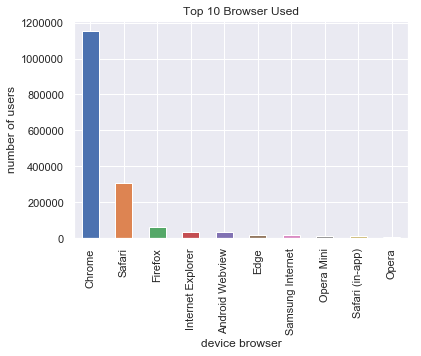

In [6]:
Top10_browser_used = train_data.groupby('device_browser')['visitId'].nunique().sort_values(ascending=False).head(10)
Top10_browser_used.plot.bar()

plt.title("Top 10 Browser Used")
plt.xlabel("device browser")
plt.ylabel("number of users")

plt.show()

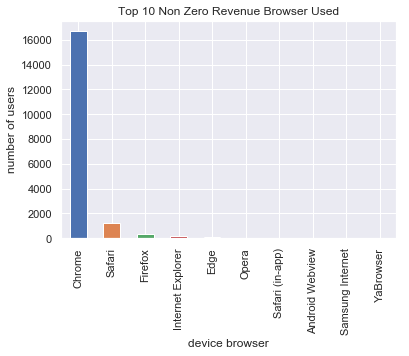

In [7]:
Top10_nonzero_revenue_browser_used = train_data[train_data.totals_transactionRevenue>0].groupby('device_browser')['visitId'].nunique().sort_values(ascending=False).head(10)

Top10_nonzero_revenue_browser_used.plot.bar()

plt.title("Top 10 Non Zero Revenue Browser Used")
plt.xlabel("device browser")
plt.ylabel("number of users")

plt.show()

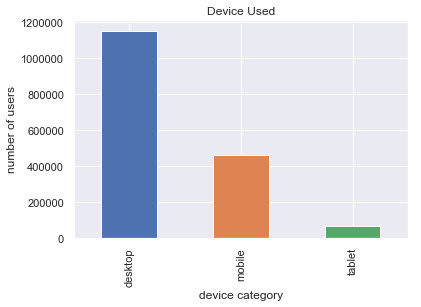

In [8]:
Device_used = train_data.groupby('device_deviceCategory')['visitId'].nunique().sort_values(ascending=False).head(10)

Device_used.plot.bar()

plt.title("Device Used")
plt.xlabel("device category")
plt.ylabel("number of users")

plt.show()

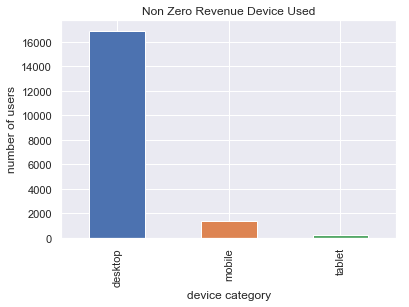

In [9]:
Nonzero_revenue_device_used = train_data[train_data.totals_transactionRevenue>0].groupby('device_deviceCategory')['visitId'].nunique().sort_values(ascending=False).head(10)

Nonzero_revenue_device_used.plot.bar()

plt.title("Non Zero Revenue Device Used")
plt.xlabel("device category")
plt.ylabel("number of users")

plt.show()

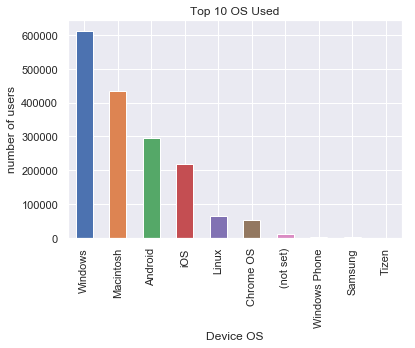

In [10]:
Top10_OS_used = train_data.groupby('device_operatingSystem')['visitId'].nunique().sort_values(ascending=False).head(10)

Top10_OS_used.plot.bar()

plt.title("Top 10 OS Used")
plt.xlabel("Device OS")
plt.ylabel("number of users")

plt.show()

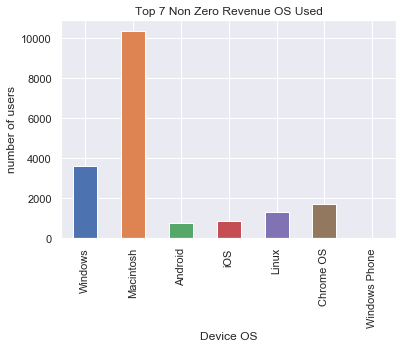

In [11]:
Top10_nonzero_revenue_OS_used = train_data[train_data.totals_transactionRevenue>0].groupby('device_operatingSystem')['visitId'].nunique().sort_values(ascending=False).head(10)


new_index = ['Windows', 'Macintosh',  'Android', 'iOS', 'Linux', 'Chrome OS', 'Windows Phone']

Top10_nonzero_revenue_OS_used = Top10_nonzero_revenue_OS_used.reindex(new_index)

Top10_nonzero_revenue_OS_used.plot.bar()

plt.title("Top 7 Non Zero Revenue OS Used")
plt.xlabel("Device OS")
plt.ylabel("number of users")

plt.show()

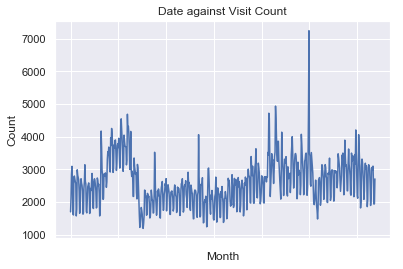

In [12]:
import matplotlib.pyplot as plt

Date_against_visitcount = train_data.groupby(['Date_Year', 'Date_Month', 'Date_Day'])['visitId'].nunique()

Date_against_visitcount.plot()

plt.title("Date against Visit Count")
plt.xlabel("Month")
plt.ylabel("Count")

plt.show()

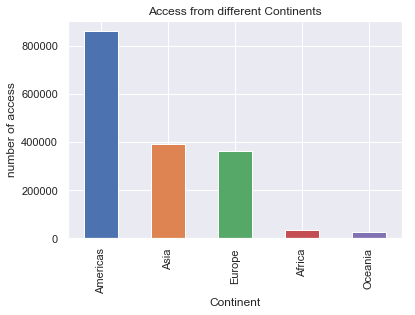

In [13]:
continent = train_data.groupby('geoNetwork_continent')['visitId'].nunique().sort_values(ascending=False).head(5)

continent.plot.bar()

plt.title("Access from different Continents")
plt.xlabel("Continent")
plt.ylabel("number of access")

plt.show()

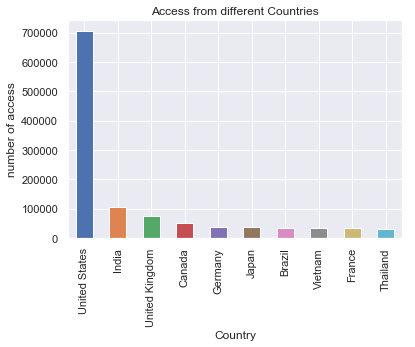

In [14]:
country = train_data.groupby('geoNetwork_country')['visitId'].nunique().sort_values(ascending=False).head(10)

country.plot.bar()

plt.title("Access from different Countries")
plt.xlabel("Country")
plt.ylabel("number of access")

plt.show()

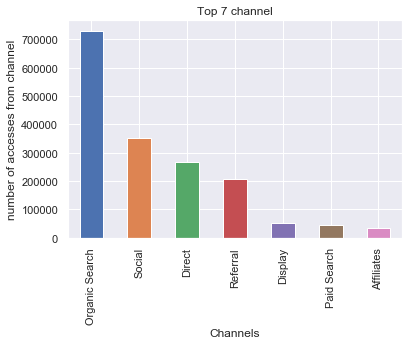

In [15]:
Top7_channel = train_data.groupby('channelGrouping')['visitId'].nunique().sort_values(ascending=False).head(7)
Top7_channel.plot.bar()

plt.title("Top 7 channel")
plt.xlabel("Channels")
plt.ylabel("number of accesses from channel")

plt.show()

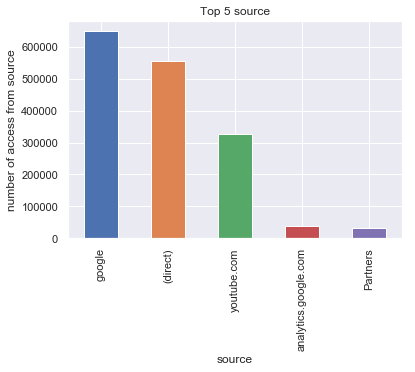

In [22]:
Top5_source = train_data.groupby('trafficSource_source')['visitId'].nunique().sort_values(ascending=False).head(5)
Top5_source.plot.bar()

plt.title("Top 5 source")
plt.xlabel("source")
plt.ylabel("number of access from source")


plt.show()